# Implementation of Gradient Descent Algorithm from scratch for the following optimization problem.

Minimize for $x_1, x_2$ the fucntion $f$ where $f(x_1, x_2) = x_1^2 + γx^2 − x_1x_2 − x_1 − x_2$

In [1]:
# Importing libraries to be used

import numpy as np
import matplotlib.pyplot as plt
import random

### (A) Write a function that implements the gradient descent algorithm (its subparts will involve differentiation and weight updation).

In [24]:
def function_f(x1,x2,gamma):
    """
    This funtion returns the function f.
    """
    f = ( x1**2 ) + ( gamma * (x2**2) ) - ( x1*x2 ) - ( x1 ) - ( x2 )
    return f

def derivative_of_f(x1, x2, gamma):
    """
    This function returns the derivative of f
    """
    df_by_dx1 = (2 * x1) - (x2) - (1)
    df_by_dx2 = (2 * gamma *  x2) - (x1) - (1)
    return df_by_dx1, df_by_dx2


def gradient_descent(x1_init, x2_init, step_size, num_iter, gamma = 1):
    """
    Performs gradient descent on function f

    """
    x1 = x1_init
    x2 = x2_init
    for ind in range(num_iter + 1):
        df_by_dx1, df_by_dx2 = derivative_of_f(x1, x2, gamma = gamma) #### differentiation 
        x1 = x1 - step_size * df_by_dx1 #### Updating the weights
        x2 = x2 - step_size * df_by_dx2 #### Updating the weights

    return x1, x2

def find_convergance_iters(x1, x2, step_size, num_iter, gamma = 1):
    """
    Finds the number of iterations needed for convergance of a function.
    """
    for i in range(num_iter):
        df_by_dx1, df_by_dx2 = derivative_of_f(x1, x2, gamma = gamma)
        x1 = x1 - step_size * df_by_dx1 
        x2 = x2 - step_size * df_by_dx2 
        
        if np.abs(df_by_dx1) <  0.00001  and np.abs(df_by_dx2) < 0.00001 :
            return i+1
    return num_iter

Answer(A): The function has been defined above with weight updation as ween as differentiation as its subparts

### (B) Using some initial values of x1 , x2 and step size = 0.1 as initial conditions, report the number of iterations required for convergence.

In [31]:
x1_init = 13  # Taking some random intial value for x1
x2_init = 12  # Taking some other random initial value for x2
step_size = 0.1 # Tking step size as 0.1 as defined in the question
num_iter = 1000 

conv_iter = find_convergance_iters(x1_init, x2_init, step_size, num_iter, gamma = 1)        
print(f'The number of iterations needed for this configuration is: {conv_iter}')

The number of iterations needed for this configuration is: 134


Answer (B): The number of iterations needed for this configuration is: 134

### (C) Plot the iteration v/s value of the function f in that iteration for the above setup. (x-axis = iteration no., y-axis = value of the function f in that iteration).

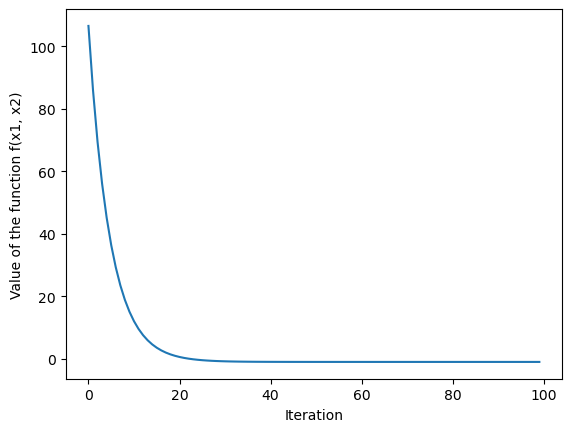

In [32]:
x1_init = 13 
x2_init = 12

x1 = x1_init
x2 = x2_init

function_values = []
step_size = 0.1
num_iter = 100

for ind in range(num_iter):
    grad = derivative_of_f(x1, x2, gamma = 1)
    x1 = x1 - (step_size * grad[0])
    x2 = x2 - (step_size * grad[1])
    value_of_function = function_f(x1, x2, gamma = 1)
    function_values.append(value_of_function)

plt.plot(range(num_iter), function_values)
plt.xlabel("Iteration")
plt.ylabel("Value of the function f(x1, x2)")
plt.show()

Answer (C): The plot is shown above, it is a hyperbolic curve

### (D) Arbitrarily choose 5 different values of step size in the interval [0,2]. Find out the number of iterations required to converge for each step size and plot step size v/s iterations graph (x-axis = step size, y-axis = iterations required to converge). You must keep the initial condition of x1 and x2 the same in all the cases.

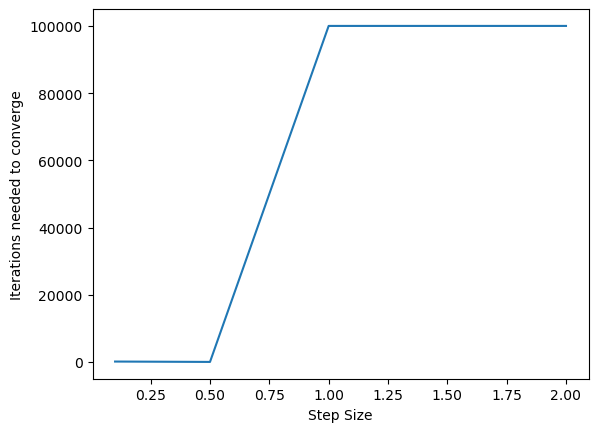

In [38]:
x1_init = 13 
x2_init = 12
num_iter_c = 100000
step_sizes = [0.1, 0.5, 1, 1.5, 2]
iter_needed_list_c = []


for step_size in step_sizes:
    conv_iter  = find_convergance_iters(x1_init, x2_init, step_size, num_iter_c, gamma = 1)
    iter_needed_list_c.append(conv_iter)

plt.plot(step_sizes, iter_needed_list_c)
plt.xlabel("Step Size")
plt.ylabel("Iterations needed to converge")
plt.show()

In [39]:
print(iter_needed_list_c)
print(step_sizes)

[134, 22, 100000, 100000, 100000]
[0.1, 0.5, 1, 1.5, 2]


Answer (D): For step_size >1; the convergance does not happen even at 100000 iterations, which indicates it is diverging

### (E) Arbitrarily choose 5 different values of γ in the interval [0,1] and find out the number of iterations required to converge for each value of γ. Plot γ v/s iterations graph (x-axis = γ, y-axis = iterations required to converge . You must keep the initial condition of x1 and x2 the same in all the cases.

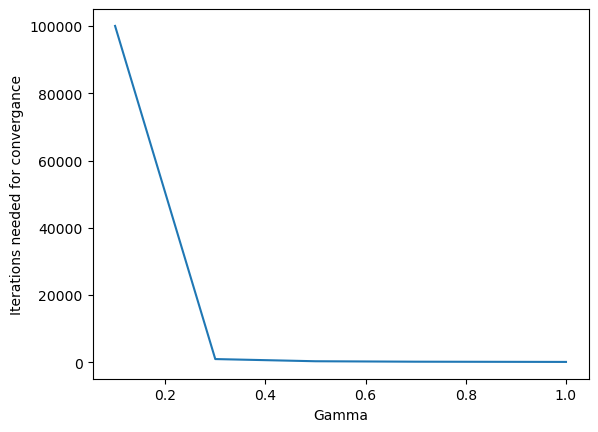

In [35]:
x1_init = 13 
x2_init = 12
num_iter = 100000
step_size = 0.1
gammas = [0.1, 0.3, 0.5, 0.7, 1]
iter_needed_list_d = []

for gamma in gammas:
    conv_iter  = find_convergance_iters(x1_init, x2_init, step_size, num_iter, gamma = gamma)
    iter_needed_list_d.append(conv_iter)

plt.plot(gammas, iter_needed_list_d)
plt.xlabel("Gamma")
plt.ylabel("Iterations needed for convergance")
plt.show()


In [36]:
print(iter_needed_list_d)
print(gammas)

[100000, 982, 335, 202, 134]
[0.1, 0.3, 0.5, 0.7, 1]


Answer (E): For gamma < 0.3 its diverging and for gamma > 0.3 it converges very quicky. 

#### (F) Run your gradient descent implementation for γ = -1 and plot Iteration v/s value of the function f in that iteration graph (x-axis = Iteration number, y-axis = value of the function f in that iteration). What do you observe? Can you think of an explanation for the observed behavior? ...Hint: think about the kind of curve a gradient descent draws.

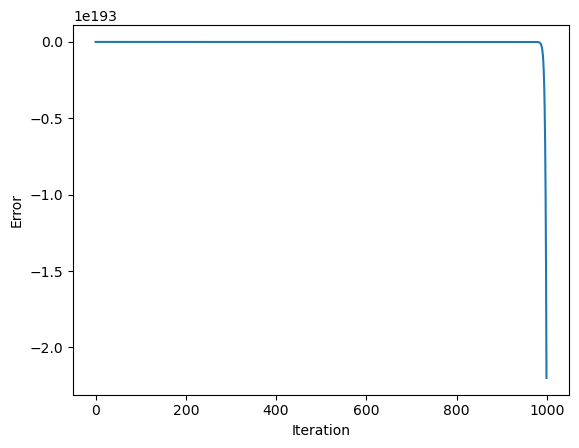

In [40]:
x1_init = 13 # taking same no. of initial values
x2_init = 12 # taking same no. of initial values

num_iter = 1000 # iterations
step_size = 0.1 # step size
gammas = -1 # taking gamma as specified
values_of_function_f = [] # value of function in each iteration

for ind in range(num_iter):
    grad = derivative_of_f(x1, x2, gamma = -1)
    x1 = x1 - (step_size * grad[0])
    x2 = x2 - (step_size * grad[1])
    value_of_function = function_f(x1, x2, gamma = -1)
    values_of_function_f.append(value_of_function)

plt.plot(range(num_iter), values_of_function_f)
plt.xlabel("Iteration")
plt.ylabel("Value of function")
plt.show()

Answer (F): When gamma is negative, the function is not a convex function, and hence it may have multiple local minimas. The algorithm may get stuck in a local minimum instead of reaching the global minimum. The above plot shows this behavior as the value of the function oscillates around a certain value instead of continuously decreasing.